In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 14_06_2022 07_33_53.xlsx')

In [4]:
filtrado = dados[['Sem Epi Internacao','Classificacao final','Internado UTI','Suporte ventilatorio','Houve internacao']]
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado

,Sem Epi Internacao,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
3,2021_05,COVID-19,Não,"Sim, não invasivo",Sim
4,NaN,COVID-19,Não Informado,"Sim, não invasivo",Não
6,NaN,COVID-19,Não Informado,Não,Não
7,NaN,COVID-19,Não Informado,Não Informado,Não
8,NaN,COVID-19,Não Informado,Não,Não
...,...,...,...,...,...
184428,2021_07,COVID-19,Sim,"Sim, invasivo",Sim
184430,2021_28,COVID-19,Sim,"Sim, não invasivo",Sim
184431,2021_07,COVID-19,Sim,"Sim, não invasivo",Sim
184432,2021_36,COVID-19,Sim,Ignorado,Sim


In [5]:
internado = filtrado.loc[filtrado['Internado UTI']=='Sim']
internado = internado.groupby('Sem Epi Internacao').count()
#internado = internado.drop('2022_34')
internado

,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
Sem Epi Internacao,,,,
2020_11,1,1,1,1
2020_12,10,10,10,10
2020_13,33,33,33,33
2020_14,39,39,39,39
2020_15,26,26,26,26
...,...,...,...,...
2022_42,3,3,3,3
2022_43,5,5,5,5
2022_44,7,7,7,7


In [6]:
internado = internado['Classificacao final']
internado.tail(21)

Sem Epi Internacao
2022_26    74
2022_27    72
2022_28    88
2022_29    95
2022_30    92
2022_31    54
2022_32    54
2022_33    61
2022_34    48
2022_35    33
2022_36    30
2022_37    27
2022_38    20
2022_39     6
2022_40    12
2022_41     9
2022_42     3
2022_43     5
2022_44     7
2022_45     3
2022_46     4
Name: Classificacao final, dtype: int64

In [7]:
suporteVent = filtrado.loc[filtrado['Suporte ventilatorio']=='Sim, invasivo']
suporteVent = suporteVent.groupby('Sem Epi Internacao').count()
#suporteVent = suporteVent.drop('2022_34')
suporteVent

,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
Sem Epi Internacao,,,,
2020_11,1,1,1,1
2020_12,8,8,8,8
2020_13,26,26,26,26
2020_14,26,26,26,26
2020_15,12,12,12,12
...,...,...,...,...
2022_42,3,3,3,3
2022_43,1,1,1,1
2022_44,2,2,2,2


In [8]:
suporteVent = suporteVent['Classificacao final']
suporteVent.tail(21)

Sem Epi Internacao
2022_26    53
2022_27    44
2022_28    51
2022_29    64
2022_30    57
2022_31    33
2022_32    40
2022_33    35
2022_34    26
2022_35    22
2022_36    18
2022_37    14
2022_38    10
2022_39     1
2022_40     9
2022_41     5
2022_42     3
2022_43     1
2022_44     2
2022_45     1
2022_46     3
Name: Classificacao final, dtype: int64

In [18]:
houveIntern = filtrado.loc[filtrado['Houve internacao']=='Sim']
houveIntern = houveIntern.groupby('Sem Epi Internacao').count()
#houveIntern = houveIntern.drop(['2022_42'])
houveIntern

,Classificacao final,Internado UTI,Suporte ventilatorio,Houve internacao
Sem Epi Internacao,,,,
2020_11,1,1,1,1
2020_12,19,19,19,19
2020_13,101,101,101,101
2020_14,111,111,111,111
2020_15,66,66,66,66
...,...,...,...,...
2022_42,26,26,26,26
2022_43,27,27,27,27
2022_44,15,15,15,15


In [19]:
houveIntern = houveIntern['Classificacao final']
houveIntern

Sem Epi Internacao
2020_11      1
2020_12     19
2020_13    101
2020_14    111
2020_15     66
          ... 
2022_42     26
2022_43     27
2022_44     15
2022_45     27
2022_46     22
Name: Classificacao final, Length: 141, dtype: int64

In [11]:
semana = internado.reset_index()
semana = semana['Sem Epi Internacao']
semana

0      2020_11
1      2020_12
2      2020_13
3      2020_14
4      2020_15
        ...   
136    2022_42
137    2022_43
138    2022_44
139    2022_45
140    2022_46
Name: Sem Epi Internacao, Length: 141, dtype: object

In [12]:
legenda = ['Hospitalizados','UTI','Suporte Ventilatório Invasivo']

In [13]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

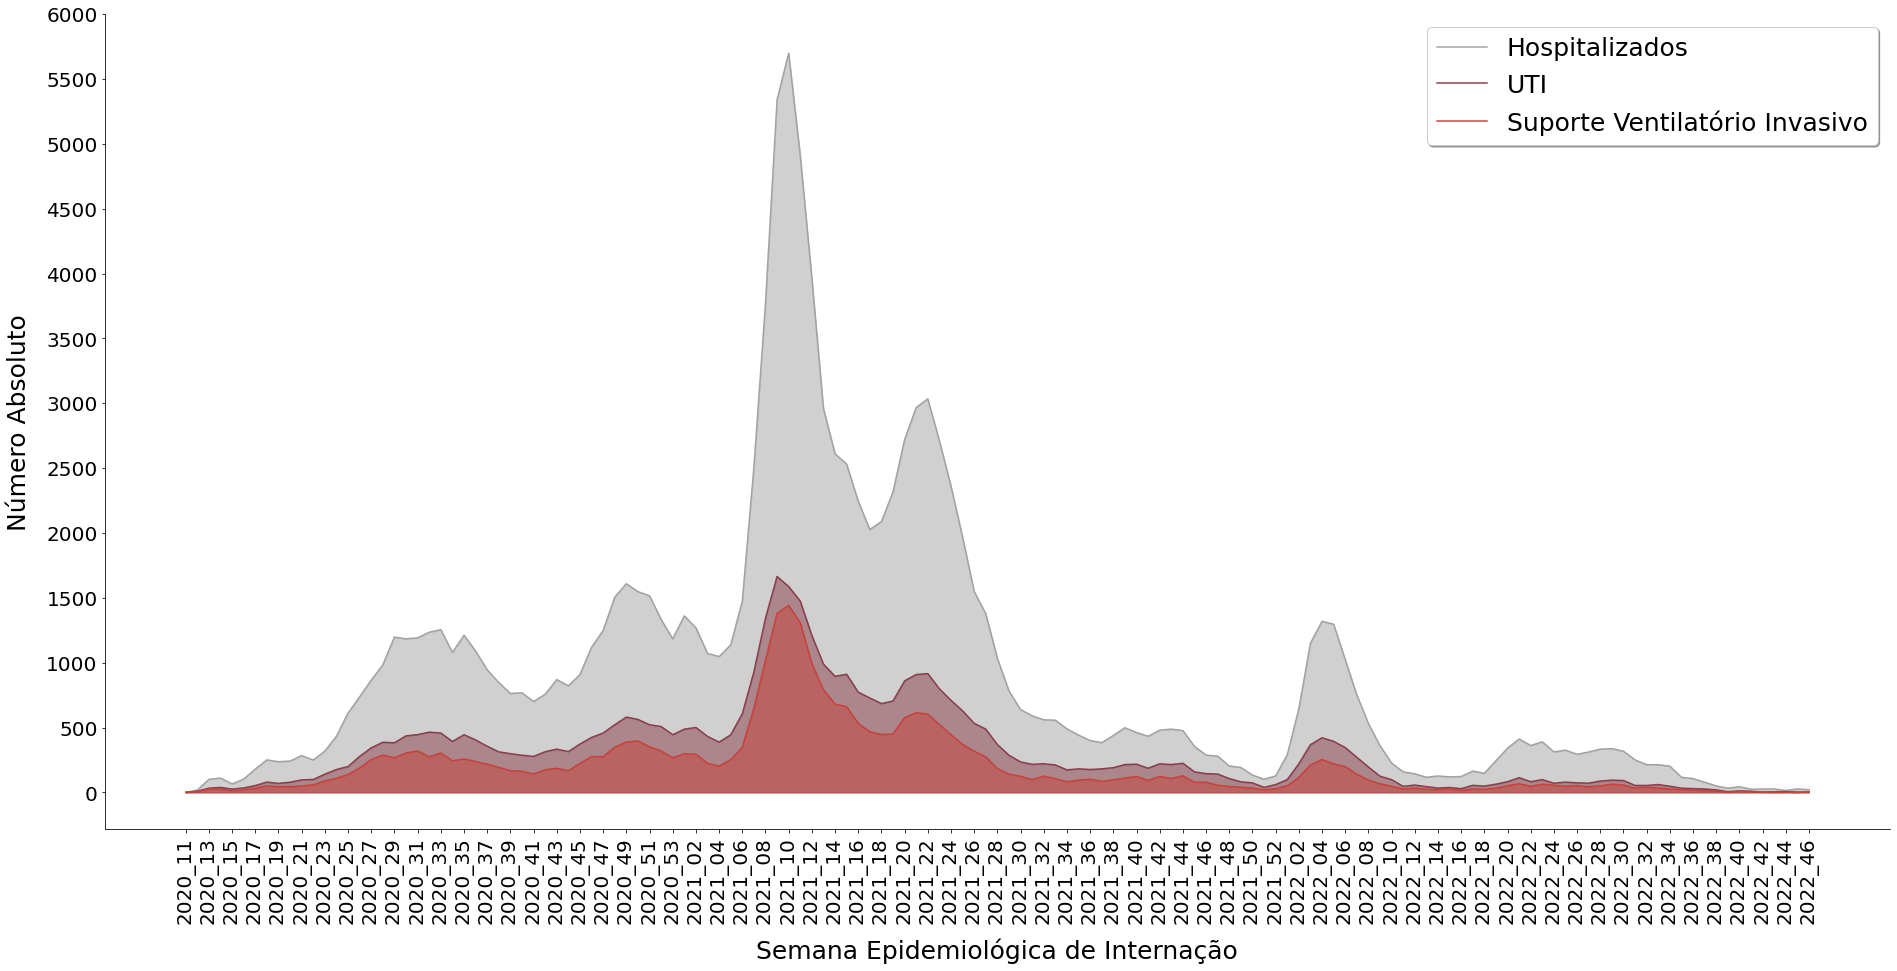

In [21]:
plt.figure(figsize=(32,15))
plt.plot(semana,houveIntern,color='#a3a2a2')
plt.plot(semana,internado,color='#8a3e4b')
plt.plot(semana,suporteVent,color='#c7433a')
plt.fill_between(semana,houveIntern,alpha=0.5,color='#a3a2a2')
plt.fill_between(semana,internado,alpha=0.5,color='#8a3e4b')
plt.fill_between(semana,suporteVent,alpha=0.5,color='#c7433a')
plt.xticks(np.arange(0,np.size(semana),2),fontsize=20, rotation=90)
plt.yticks(np.arange(0,6500,500),fontsize=20)
plt.xlabel('Semana Epidemiológica de Internação',fontsize=25,labelpad=15)
plt.ylabel('Número Absoluto', fontsize=25, labelpad=15)
plt.legend(legenda, fontsize=25, shadow = True)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/hospUTISuport_Covid.png',dpi=320,bbox_inches='tight')

In [22]:
zoomInternado = internado['2022_37':]
zoomInternado.tail()

Sem Epi Internacao
2022_42    3
2022_43    5
2022_44    7
2022_45    3
2022_46    4
Name: Classificacao final, dtype: int64

In [23]:
zoomSuporteVent = suporteVent['2022_37':]
zoomSuporteVent.tail()

Sem Epi Internacao
2022_42    3
2022_43    1
2022_44    2
2022_45    1
2022_46    3
Name: Classificacao final, dtype: int64

In [24]:
zoomHouveIntern = houveIntern['2022_37':]
zoomHouveIntern.tail()

Sem Epi Internacao
2022_42    26
2022_43    27
2022_44    15
2022_45    27
2022_46    22
Name: Classificacao final, dtype: int64

In [25]:
internado

Sem Epi Internacao
2020_11     1
2020_12    10
2020_13    33
2020_14    39
2020_15    26
           ..
2022_42     3
2022_43     5
2022_44     7
2022_45     3
2022_46     4
Name: Classificacao final, Length: 141, dtype: int64

In [26]:
zoomSemana = zoomInternado
zoomSemana = zoomSemana.reset_index()
zoomSemana = zoomSemana['Sem Epi Internacao']
zoomSemana.tail()

25    2022_42
26    2022_43
27    2022_44
28    2022_45
29    2022_46
Name: Sem Epi Internacao, dtype: object

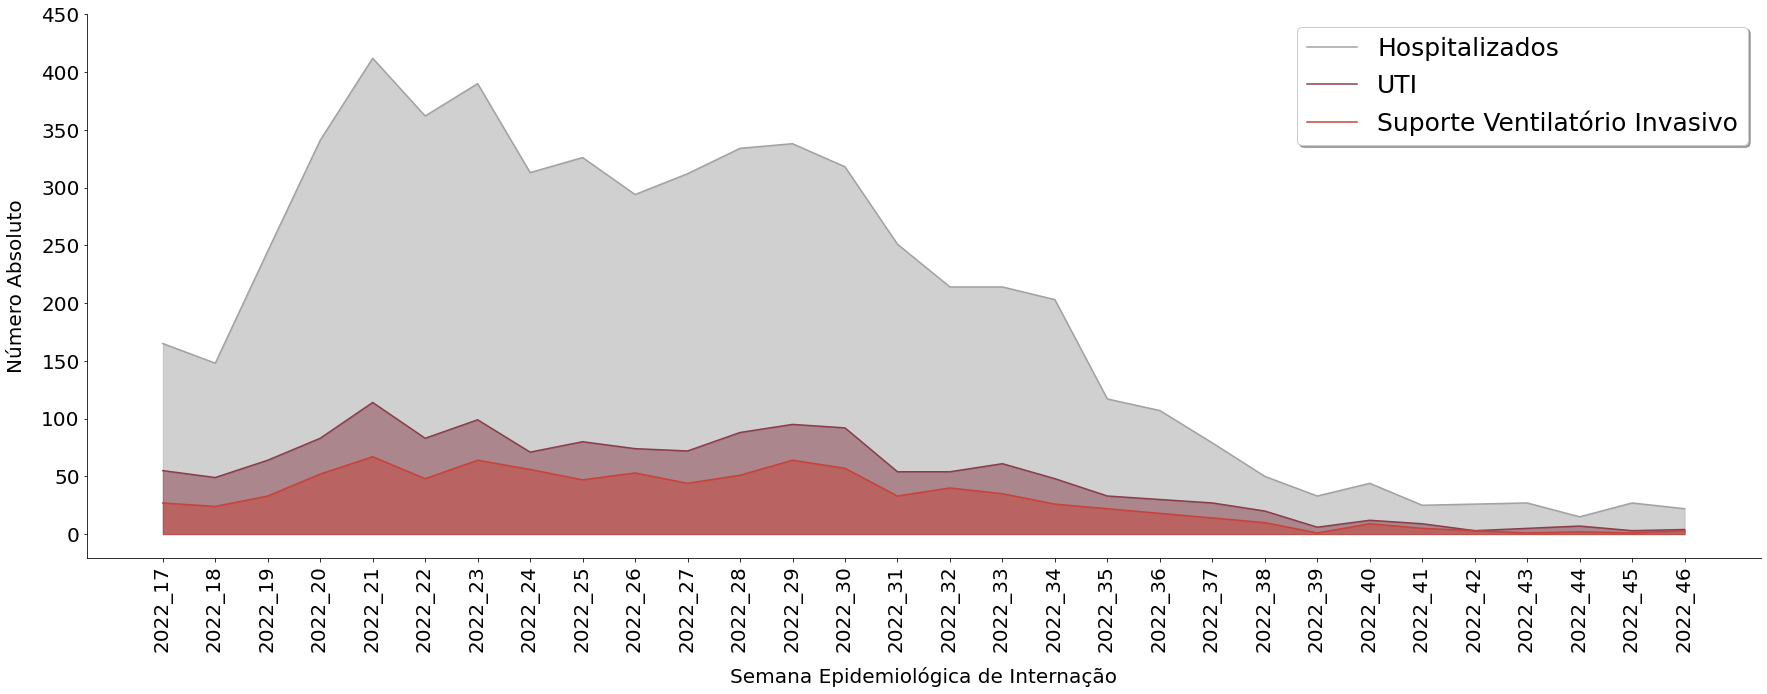

In [27]:
plt.figure(figsize=(30,10))
plt.plot(zoomSemana,zoomHouveIntern,color='#a3a2a2')
plt.plot(zoomSemana,zoomInternado,color='#8a3e4b')
plt.plot(zoomSemana,zoomSuporteVent,color='#c7433a')
plt.fill_between(zoomSemana,zoomHouveIntern,alpha=0.5,color='#a3a2a2')
plt.fill_between(zoomSemana,zoomInternado,alpha=0.5,color='#8a3e4b')
plt.fill_between(zoomSemana,zoomSuporteVent,alpha=0.5,color='#c7433a')
plt.xticks(fontsize=20, rotation=90)
plt.yticks(np.arange(0,500,50),fontsize=20)
plt.xlabel('Semana Epidemiológica de Internação',fontsize=20,labelpad=15)
plt.ylabel('Número Absoluto', fontsize=20, labelpad=15)
plt.legend(legenda, fontsize=25, shadow = True)
sns.despine()
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/hospUTISuport_CovidZoom.png',dpi=720,bbox_inches='tight')